<a href="https://colab.research.google.com/github/ZiadHamada/Account/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
trainpath = "/content/drive/MyDrive/Colab Notebooks/biotite_pyrite_quarts_/train_set/"
testpath =  "/content/drive/MyDrive/Colab Notebooks/biotite_pyrite_quarts_/test_set/"
predpath =  "/content/drive/MyDrive/Colab Notebooks/biotite_pyrite_quarts_/predict_set/"

In [ ]:
for folder in  os.listdir(trainpath): 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 901 in folder quarts
For training data , found 881 in folder pyrite
For training data , found 872 in folder biotite


In [ ]:
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 176 in folder pyrite
For testing data , found 170 in folder biotite
For testing data , found 290 in folder quarts


In [ ]:
files = gb.glob(pathname= str(predpath +'*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 198


In [ ]:
code = {'biotite':0 ,'pyrite':1,'quarts':2}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [ ]:
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(400, 400, 3)      242
(640, 640, 3)      233
(1000, 1000, 3)    180
(600, 800, 3)      113
(480, 640, 3)       84
                  ... 
(450, 700, 3)        1
(747, 837, 3)        1
(1094, 1588, 3)      1
(1974, 2600, 3)      1
(293, 220, 3)        1
Length: 427, dtype: int64

In [ ]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(1000, 1000, 3)    58
(400, 400, 3)      55
(640, 640, 3)      47
(600, 800, 3)      27
(480, 640, 3)      14
                   ..
(422, 500, 3)       1
(161, 150, 3)       1
(497, 300, 3)       1
(251, 498, 3)       1
(4160, 3120, 3)     1
Length: 286, dtype: int64

In [ ]:
size = []
files = gb.glob(pathname= str(predpath +'/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(400, 400, 3)      11
(600, 800, 3)       8
(1000, 1000, 3)     8
(285, 380, 3)       5
(640, 640, 3)       5
                   ..
(519, 640, 3)       1
(333, 444, 3)       1
(175, 289, 3)       1
(270, 340, 3)       1
(450, 600, 3)       1
Length: 141, dtype: int64

In [ ]:
s = 100

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 2654 items in X_train


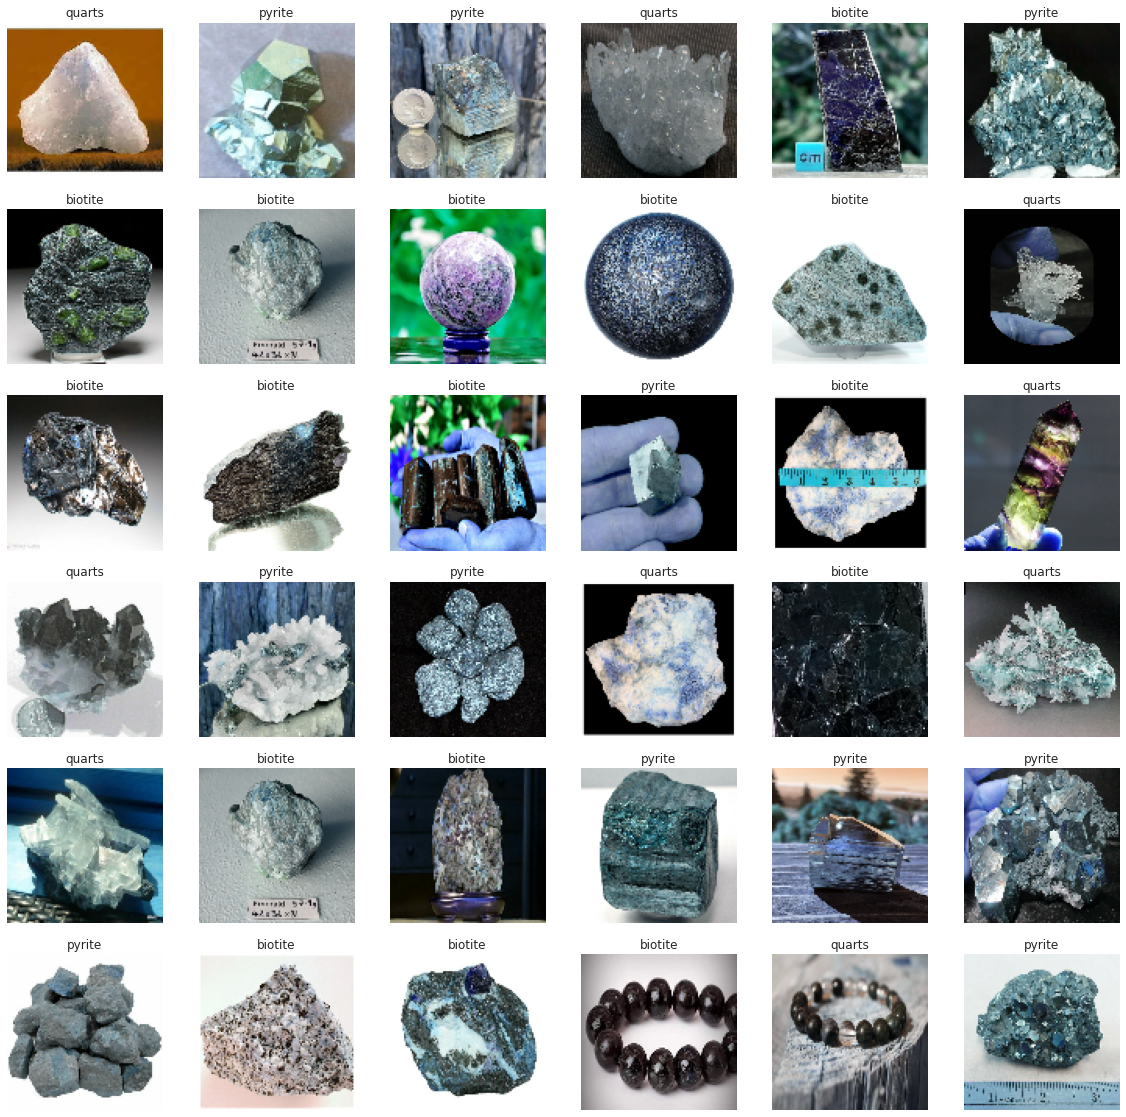

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str(testpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 636 items in X_test


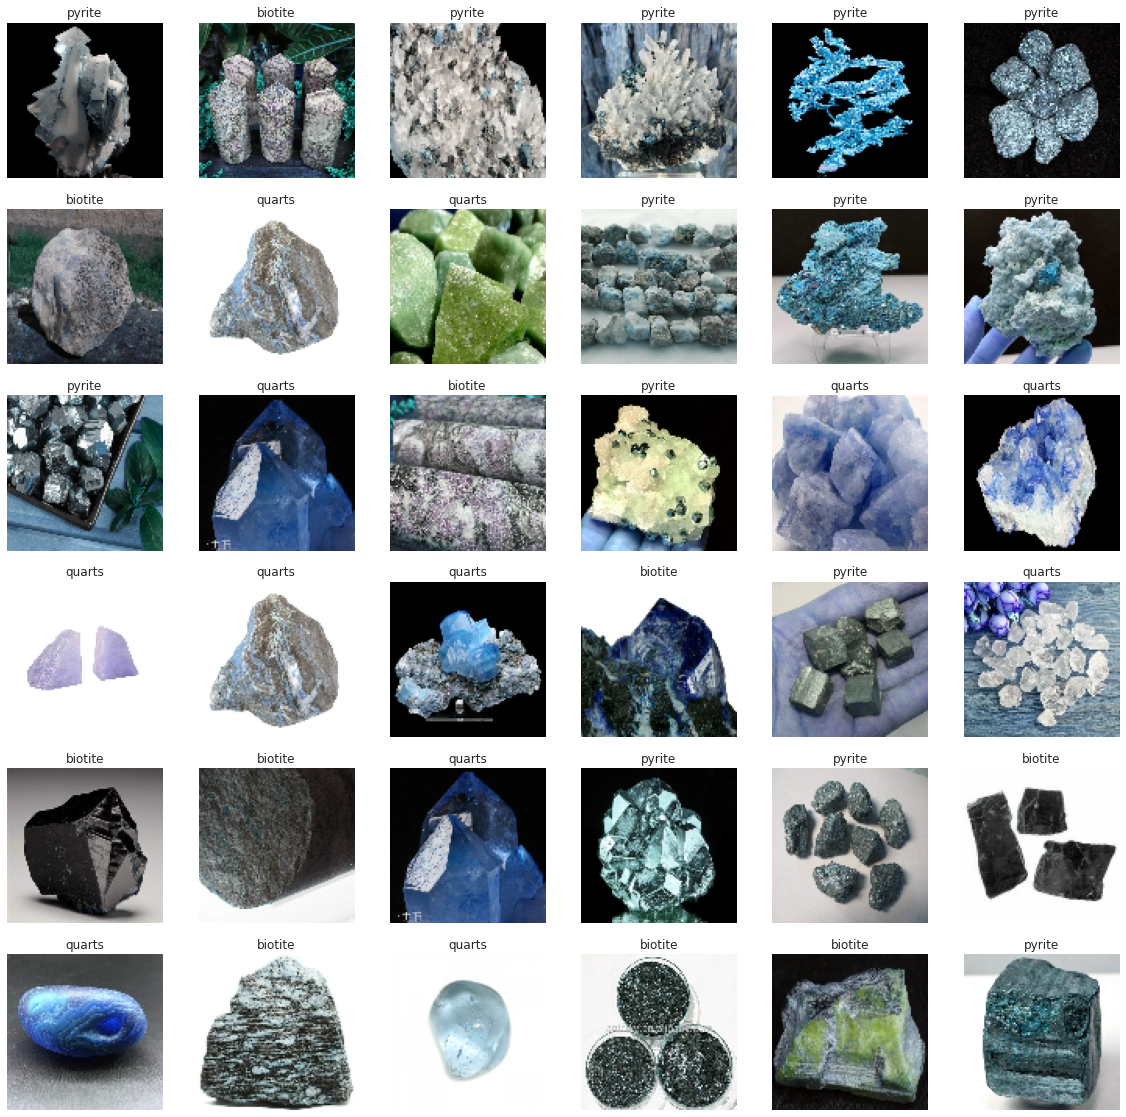

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

we have 198 items in X_pred


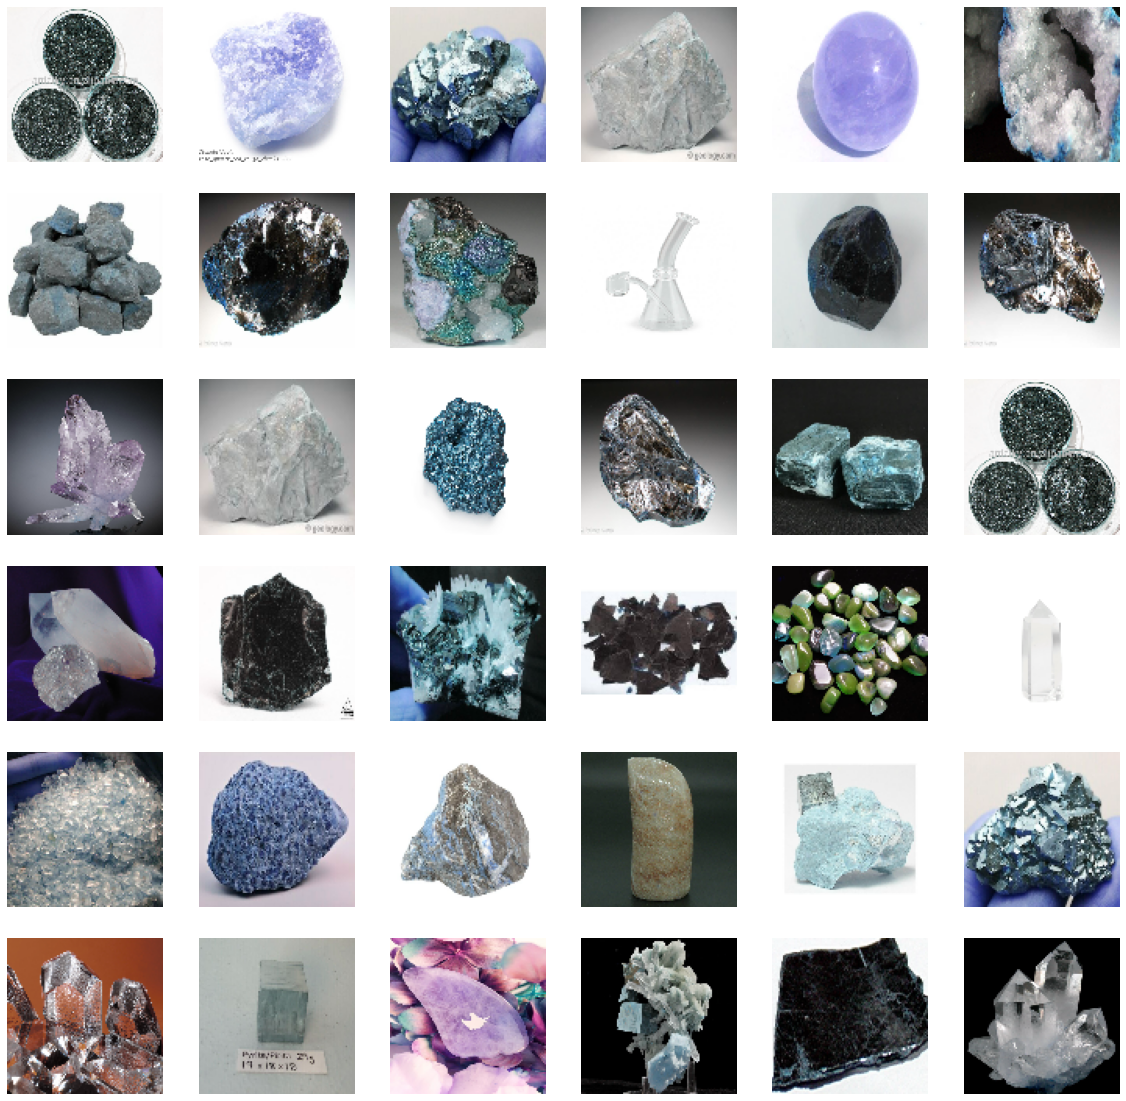

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (2654, 100, 100, 3)
X_test shape  is (636, 100, 100, 3)
X_pred shape  is (198, 100, 100, 3)
y_train shape  is (2654,)
y_test shape  is (636,)


In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.1) ,            
        keras.layers.Dense(3,activation='softmax') ,    
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [ ]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/10
83/83 [==============================] - 851s 10s/step - loss: 1.6807 - accuracy: 0.3787
Epoch 2/10
83/83 [==============================] - 847s 10s/step - loss: 0.9909 - accuracy: 0.5098
Epoch 3/10
83/83 [==============================] - 851s 10s/step - loss: 0.8698 - accuracy: 0.6108
Epoch 4/10
83/83 [==============================] - 845s 10s/step - loss: 0.6489 - accuracy: 0.7374
Epoch 5/10
83/83 [==============================] - 846s 10s/step - loss: 0.5015 - accuracy: 0.8029
Epoch 6/10
83/83 [==============================] - 846s 10s/step - loss: 0.3962 - accuracy: 0.8497
Epoch 7/10
83/83 [==============================] - 855s 10s/step - loss: 0.3239 - accuracy: 0.8798
Epoch 8/10
83/83 [==============================] - 851s 10s/step - loss: 0.2544 - accuracy: 0.9115
Epoch 9/10
83/83 [==============================] - 849s 10s/step - loss: 0.1867 - accuracy: 0.9359
Epoch 10/10
83/83 [==============================] - 849s 10s/step - loss: 0.1739 - accuracy: 0.9439

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

20/20 [==============================] - 60s 3s/step - loss: 0.2263 - accuracy: 0.9450
Test Loss is 0.2262984961271286
Test Accuracy is 0.944968581199646


In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (636, 3)


In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (198, 3)


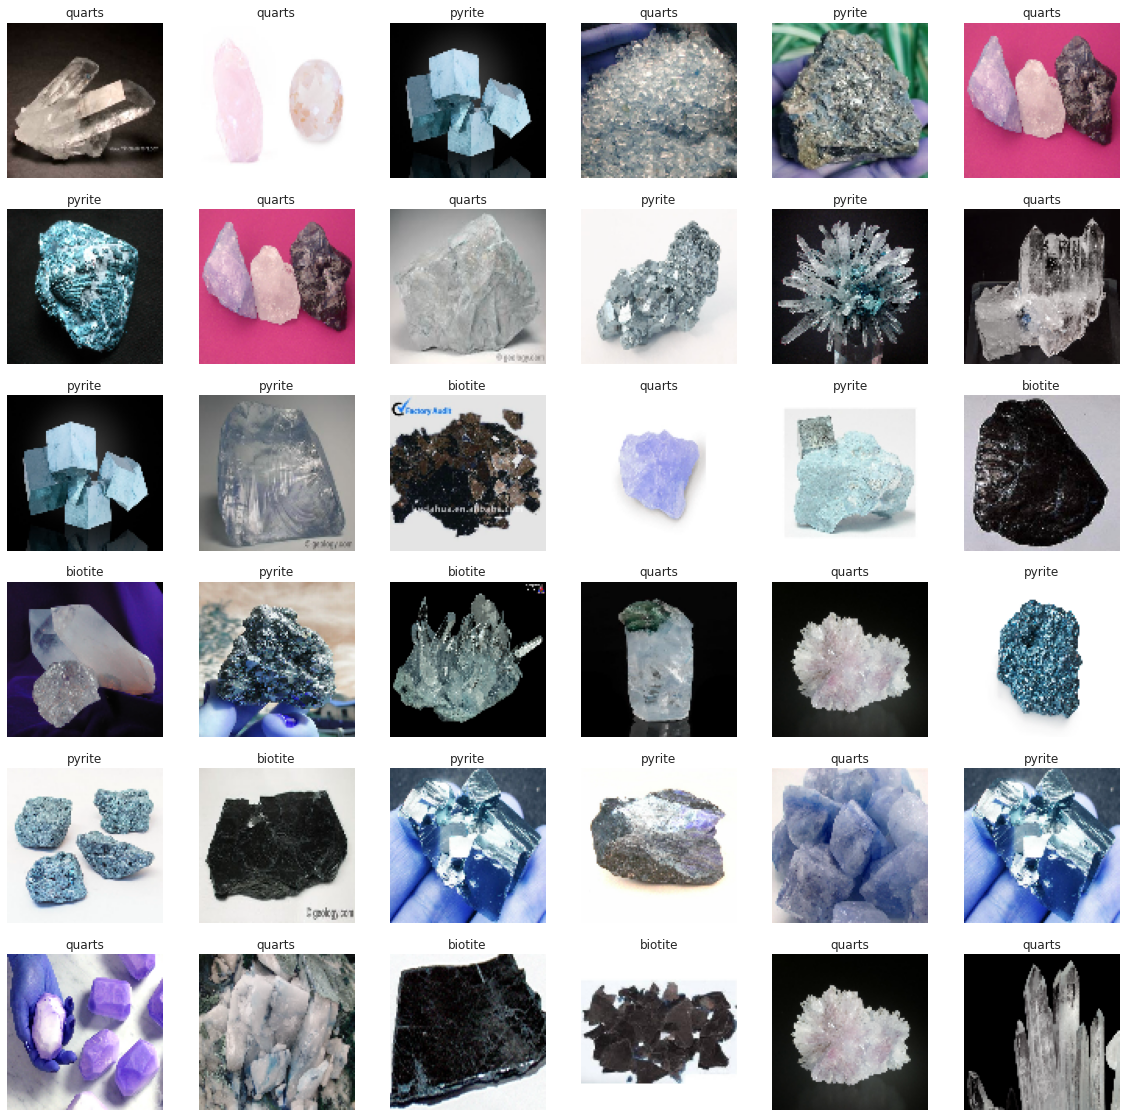

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))